<a href="https://colab.research.google.com/github/Arkade7/DataMining/blob/main/Covid-19_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("/content/Data Covid19 (1).csv")
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Province/State  173972 non-null  object
 1   Country/Region  236017 non-null  object
 2   Last Update     236017 non-null  object
 3   Confirmed       236017 non-null  int64 
 4   Deaths          236017 non-null  int64 
 5   Recovered       236017 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 10.8+ MB


In [11]:
data['Last Update'].unique()

array(['1/22/2020 17:00', '1/23/20 17:00', '1/24/20 17:00', ...,
       '26/02/2021 05.22', '27/02/2021 05.22', '28/02/2021 05.22'],
      dtype=object)

In [12]:
latest_date="28/02/2021 05.22"
data[data['Last Update']==latest_date]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
235253,NaN,Afghanistan,28/02/2021 05.22,55707,2443,49288
235254,NaN,Albania,28/02/2021 05.22,106215,1775,68969
235255,NaN,Algeria,28/02/2021 05.22,112960,2979,77976
235256,NaN,Andorra,28/02/2021 05.22,10849,110,10429
235257,NaN,Angola,28/02/2021 05.22,20782,506,19315
...,...,...,...,...,...,...
236012,Zaporizhia Oblast,Ukraine,28/02/2021 05.22,69504,1132,65049
236013,Zeeland,Netherlands,28/02/2021 05.22,16480,178,0
236014,Zhejiang,Mainland China,28/02/2021 05.22,1321,1,1314
236015,Zhytomyr Oblast,Ukraine,28/02/2021 05.22,50582,834,44309


In [13]:
unique_countries = data[data.Confirmed>0]["Country/Region"].unique()
unique_countries.sort()
unique_countries

array([' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Diamond Princess', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'F

In [14]:
country_confirmed_case = []
for i in unique_countries:
    country_confirmed_case.append(data[data.Confirmed>0][data["Country/Region"]==i][data["Last Update"]==latest_date].Confirmed.sum())

<ipython-input-14-f043f6b97d73>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_confirmed_case.append(data[data.Confirmed>0][data["Country/Region"]==i][data["Last Update"]==latest_date].Confirmed.sum())


In [15]:
print(set(zip(unique_countries, country_confirmed_case)))

{('Papua New Guinea', 1275), ('Algeria', 112960), ('Dominica', 142), ('Venezuela', 138739), ('Tajikistan', 13308), ('Ghana', 82586), ('Netherlands', 1098875), ('Ireland', 218980), ('Cuba', 49161), ('West Bank and Gaza', 181909), ('Botswana', 28371), ('Cambodia', 805), ('The Gambia', 0), ('UK', 4182772), ('Bahamas', 8519), ('Cayman Islands', 0), ('Costa Rica', 204341), ('Nicaragua', 6445), ('Guinea-Bissau', 3247), ('Finland', 57052), ('Albania', 106215), ('East Timor', 0), ('Malta', 22219), ('Djibouti', 6065), ('Republic of Ireland', 0), ('Turkey', 2693164), ('Guernsey', 0), ('Switzerland', 554932), ('Lesotho', 10491), ('Pakistan', 579973), ('Estonia', 64399), ('Mauritius', 610), ('Chile', 821418), ('Guyana', 8550), ('Latvia', 85810), ('Panama', 340445), ('Zambia', 78202), ('Brazil', 10517232), ('South Korea', 89676), ('Azerbaijan', 234267), ('Kenya', 105648), ('Georgia', 270510), ('Argentina', 2104197), ('Palestine', 0), ('Uzbekistan', 79836), ('Italy', 2907825), ('Libya', 132458), ('U

In [16]:
unique_provinces = data["Province/State"][data.Confirmed>1].unique()
unique_provinces

array(['Beijing', 'Chongqing', 'Guangdong', 'Guangxi', 'Hainan', 'Henan',
       'Hubei', 'Hunan', 'Jiangxi', 'Liaoning', 'Shandong', 'Shanghai',
       'Sichuan', 'Tianjin', 'Zhejiang', nan, 'Anhui', 'Fujian', 'Gansu',
       'Guizhou', 'Heilongjiang', 'Hong Kong', 'Jiangsu', 'Macau',
       'Shaanxi', 'Xinjiang', 'Yunnan', 'Jilin', 'Taiwan', 'Ningxia',
       'Hebei', 'Inner Mongolia', 'Shanxi', 'California', 'Qinghai',
       'New South Wales', 'Bavaria', 'Ontario', 'Victoria', 'Queensland',
       'Illinois', 'Chicago, IL', 'South Australia', 'San Benito, CA',
       'Santa Clara, CA', 'Toronto, ON', 'British Columbia',
       'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'Ashland, NE', 'Travis, CA',
       'From Diamond Princess', 'Lackland, TX',
       'Omaha, NE (From Diamond Princess)',
       'Travis, CA (From Diamond Princess)',
       'Lackland, TX (From Diamond Princess)',
       'Unassigned Location (From Diamond Princess)', 'None',
       '

In [17]:
province_confirmed_case=[]
for i in unique_provinces:
    province_confirmed_case.append(data[data.Confirmed>0][data["Province/State"]==i][data["Last Update"]==latest_date].Confirmed.sum())

<ipython-input-17-32ac27aaee21>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_confirmed_case.append(data[data.Confirmed>0][data["Province/State"]==i][data["Last Update"]==latest_date].Confirmed.sum())


In [18]:
print(set(zip(unique_provinces, province_confirmed_case)))

{('Chechen Republic', 11287), ('Idaho', 171140), ('Western Australia', 913), ('Hokkaido', 19059), ('Guainia', 1304), ('Portland, OR', 0), ('Mato Grosso do Sul', 180986), ('Orange County, CA', 0), ('Johnson County, IA', 0), ('Jharkhand', 119905), ('Aguascalientes', 23081), ("Valle d'Aosta", 8021), ('Los Lagos', 51254), ('Ucayali', 22636), ('Flevoland', 25719), ('Santa Clara County, CA', 0), ('Pais Vasco', 150674), ('Suffolk County, MA', 0), ('Zhytomyr Oblast', 50582), ('San Mateo, CA', 0), ('Luhansk Oblast', 14960), ('Zeeland', 16480), ('Uttarakhand', 97031), ('Gibraltar', 4238), ('New Jersey', 786967), (nan, 0), ('Nunavut', 356), ('Zakarpattia Oblast', 39830), ('Andaman and Nicobar Islands', 5018), ('Snohomish County, WA', 0), ('Jackson County, OR ', 0), ('Fukushima', 1948), ('Saitama', 29292), ('Ceuta', 4562), ('South Dakota', 112293), ('Noord-Brabant', 170903), ('Santa Clara, CA', 0), ('Castilla y Leon', 205587), ('Altai Krai', 43399), ('Kanagawa', 44822), ('Harrison County, KY', 0),

In [19]:
nan_indices=[]
for i in range(len(unique_provinces)):
    if type(unique_provinces[i])==float:
        nan_indices.append(i)

In [20]:
unique_provinces = list(unique_provinces)
province_confirmed_case = list(province_confirmed_case)

In [21]:
for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_case.pop(i)
    
unique_provinces

['Beijing',
 'Chongqing',
 'Guangdong',
 'Guangxi',
 'Hainan',
 'Henan',
 'Hubei',
 'Hunan',
 'Jiangxi',
 'Liaoning',
 'Shandong',
 'Shanghai',
 'Sichuan',
 'Tianjin',
 'Zhejiang',
 'Anhui',
 'Fujian',
 'Gansu',
 'Guizhou',
 'Heilongjiang',
 'Hong Kong',
 'Jiangsu',
 'Macau',
 'Shaanxi',
 'Xinjiang',
 'Yunnan',
 'Jilin',
 'Taiwan',
 'Ningxia',
 'Hebei',
 'Inner Mongolia',
 'Shanxi',
 'California',
 'Qinghai',
 'New South Wales',
 'Bavaria',
 'Ontario',
 'Victoria',
 'Queensland',
 'Illinois',
 'Chicago, IL',
 'South Australia',
 'San Benito, CA',
 'Santa Clara, CA',
 'Toronto, ON',
 'British Columbia',
 'Cruise Ship',
 'Diamond Princess cruise ship',
 'San Diego County, CA',
 'Ashland, NE',
 'Travis, CA',
 'From Diamond Princess',
 'Lackland, TX',
 'Omaha, NE (From Diamond Princess)',
 'Travis, CA (From Diamond Princess)',
 'Lackland, TX (From Diamond Princess)',
 'Unassigned Location (From Diamond Princess)',
 'None',
 'Sacramento County, CA',
 'Seattle, WA',
 'Western Australia',
 'S

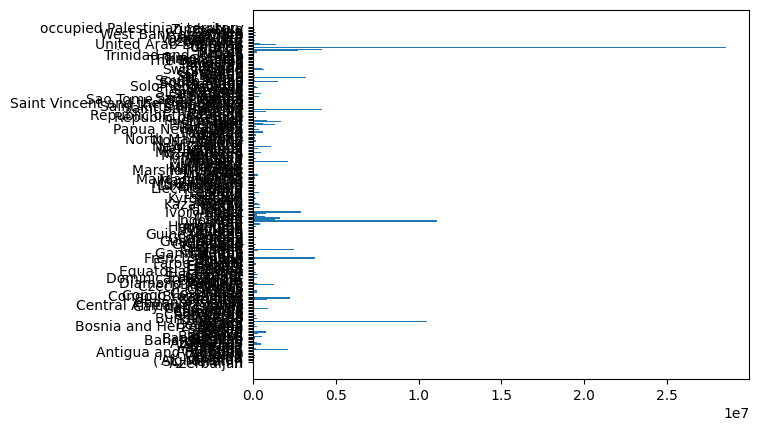

In [22]:
plt.barh(unique_countries, country_confirmed_case)
plt.show()

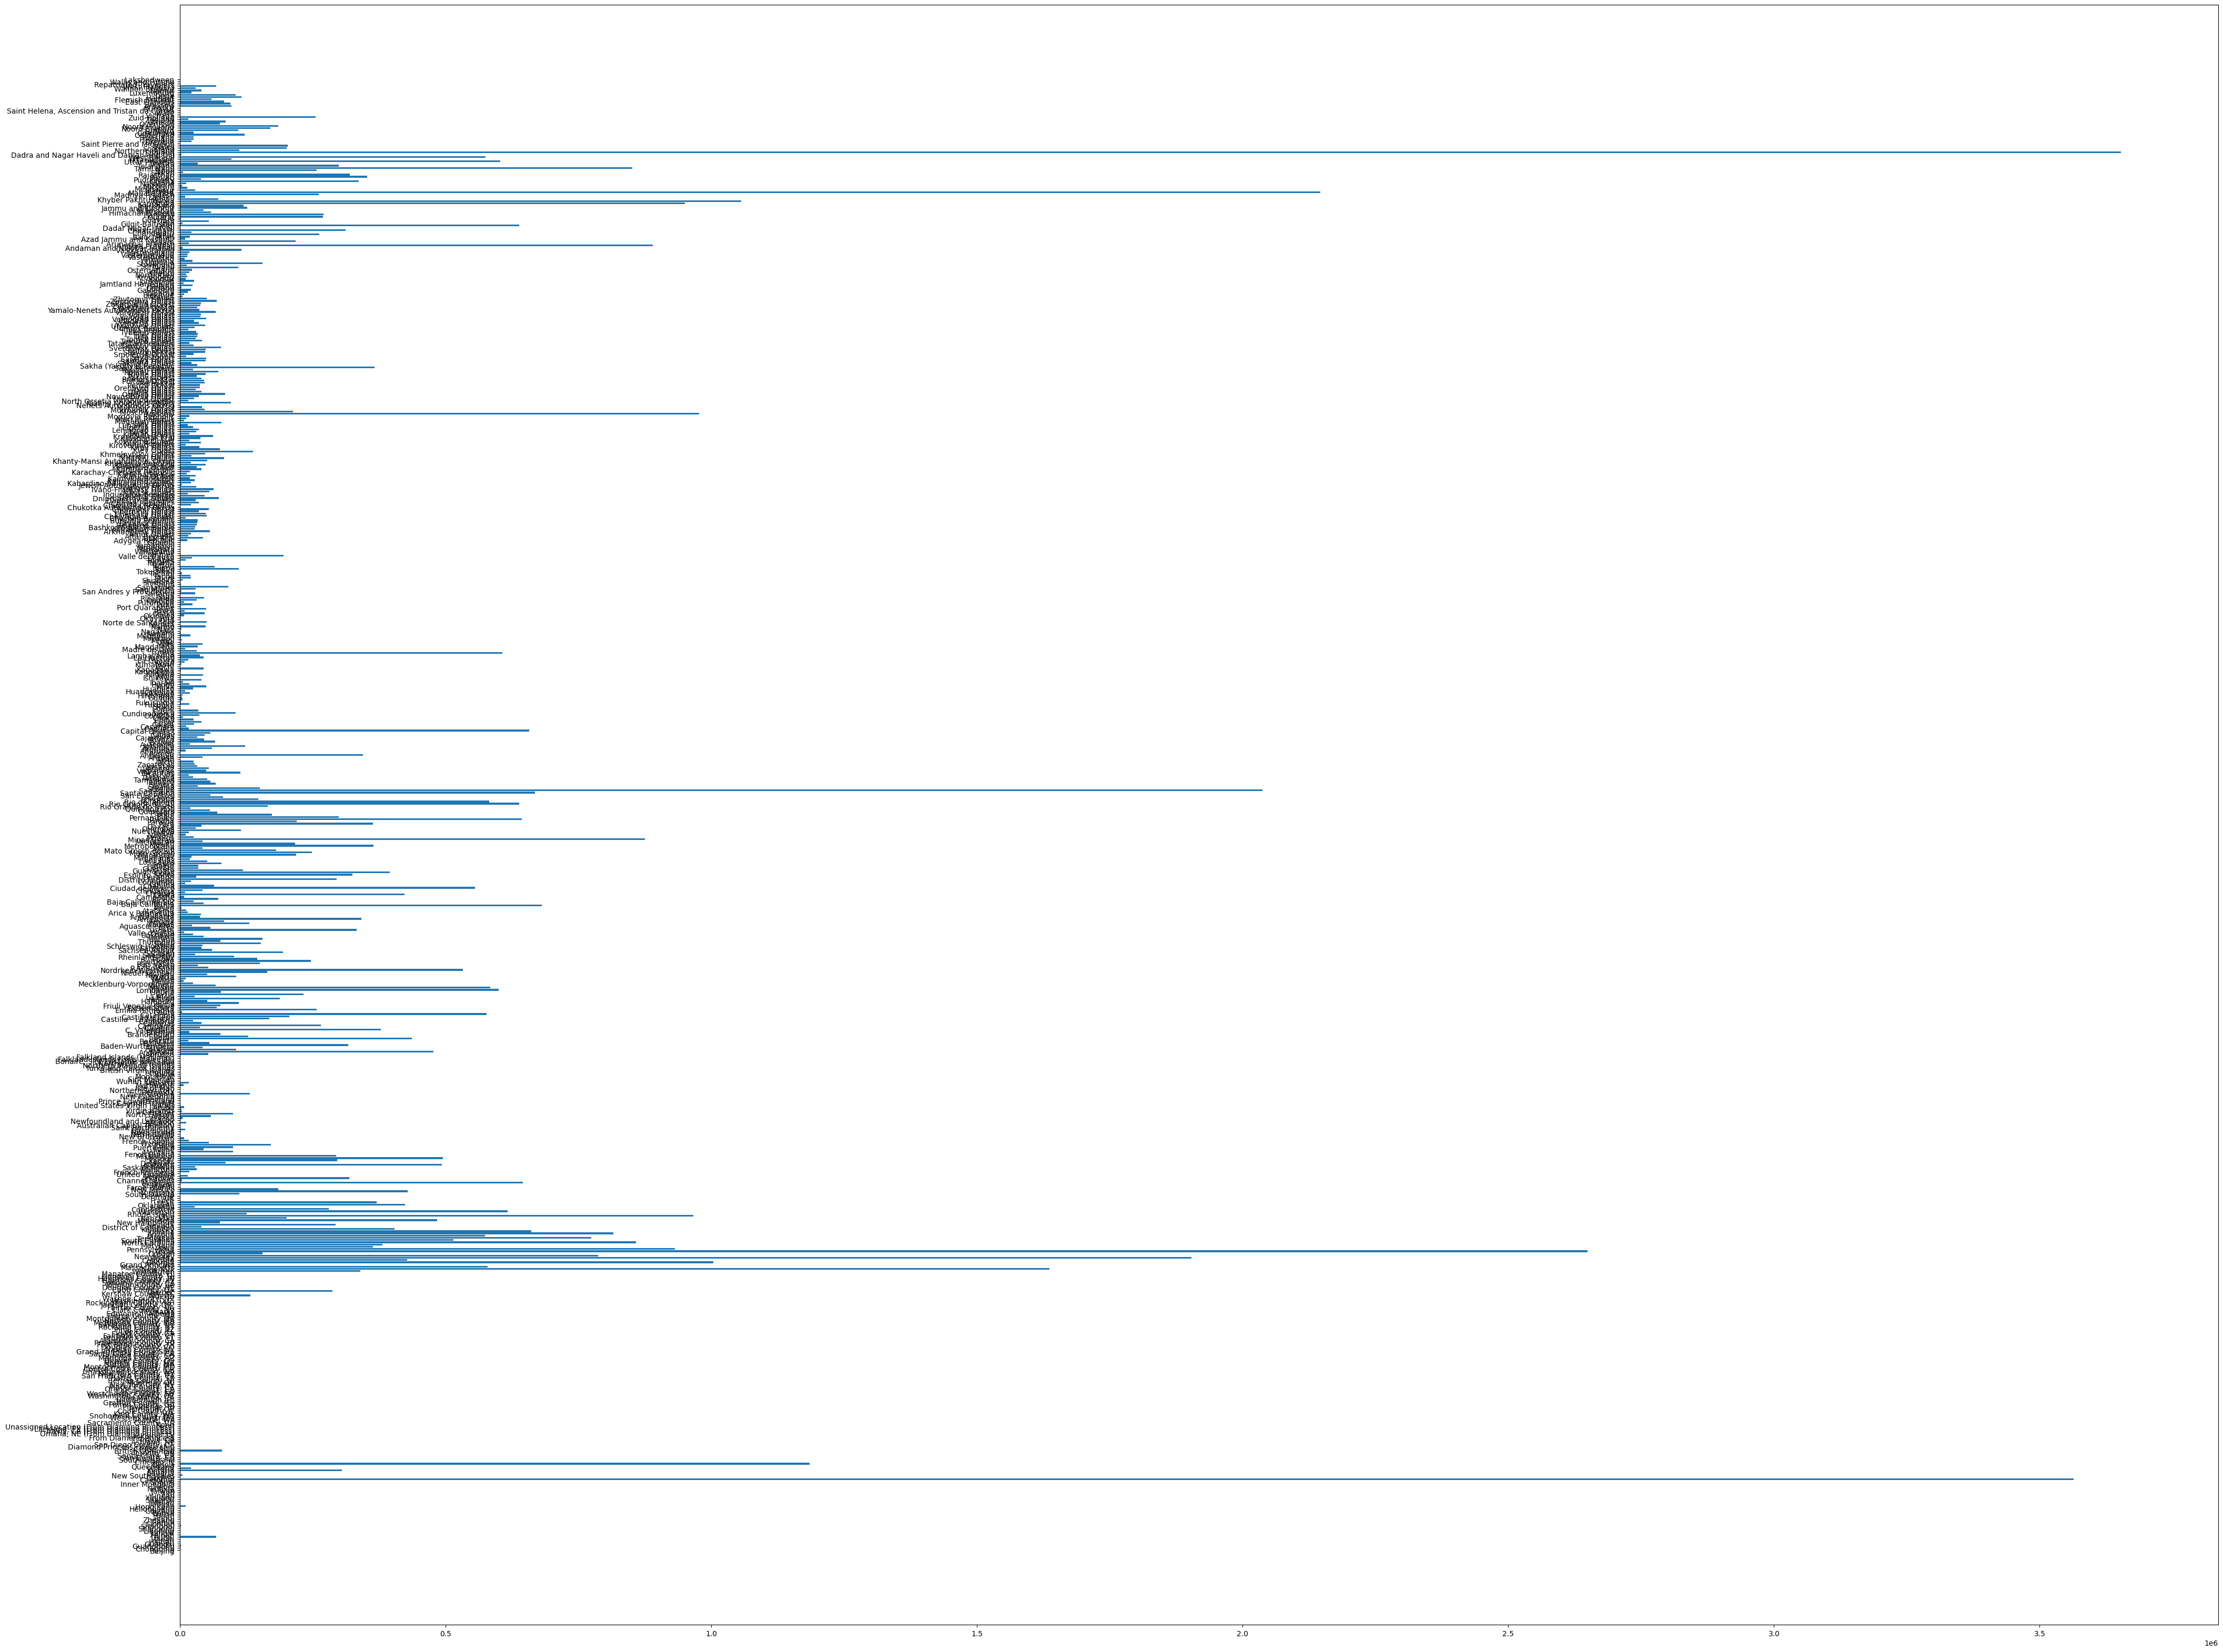

In [23]:
plt.figure(figsize=(50,40))
plt.barh(unique_provinces, province_confirmed_case)
plt.show()

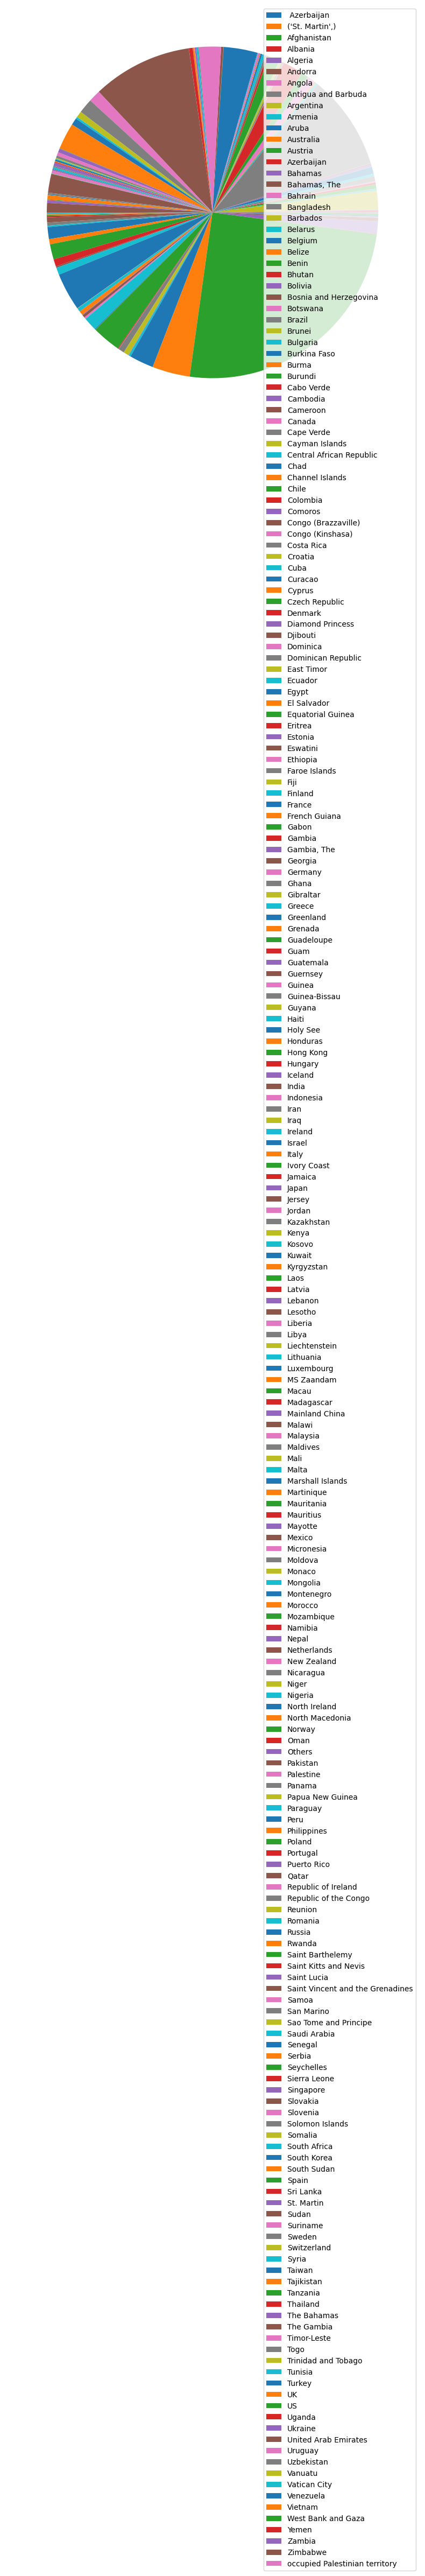

In [24]:
plt.figure(figsize=(10,10))
plt.pie(country_confirmed_case)
plt.legend(unique_countries, loc='best')
plt.show()